# SF-DAT-21 | Unit Project 4

In this project, you will summarize and present your analysis from Unit Projects 1-3.

### Question 1. Introduction: Write a problem Statement/Specific Aim for this project.

Answer: Using GRE score, GPA score, and prestige (candidate rank) to predict candidate admission to graduate school at UCLA. 

### Question 2. Dataset: Write up a description of your data and any cleaning that was completed.

Answer: This dataset contains three covariates – GRE, GPA, and prestige – which predict the outcome: admit. Admit and prestige are both cateogrical variables while GRE and GPA are continuous variables. Prestige ranges from 1 to 4, with a rank of 1 being the highest prestige.  

Data cleaning steps: 

1) Drop missing data points 

2) 

### Question 3. Demo: Provide a table that explains the data by admission status.

Mean (STD) or counts by admission status for each variable

| Not Admitted | Admitted
---| ---|---
GPA | mean(std) | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model
from IPython.display import display, HTML
%matplotlib inline

df_raw = pd.read_csv("admissions.csv")
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [38]:
df_raw.dropna(inplace=True)

In [39]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [40]:
dummy_ranks = pd.get_dummies(df_raw.prestige, prefix = 'prestige')
cols_to_keep = ['admit', 'gre', 'gpa']
df = df_raw[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
df.columns = ['admit', 'gre', 'gpa','prestige_1','prestige_2','prestige_3','prestige_4']

In [41]:
admit1Df = df[df.admit == 1]
admit0Df = df[df.admit == 0]

In [42]:
print "Admitted:"
display(admit1Df.describe())
print "Not admitted:"
HTML(admit0Df.describe().to_html())

Admitted:


,admit,gre,gpa,prestige_1,prestige_2,prestige_3,prestige_4
count,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,1.0,618.571429,3.489206,0.261905,0.420635,0.222222,0.095238
std,0.0,109.257233,0.371655,0.441426,0.495632,0.417399,0.294715
min,1.0,300.000000,2.420000,0.000000,0.000000,0.000000,0.000000
25%,1.0,540.000000,3.220000,0.000000,0.000000,0.000000,0.000000
50%,1.0,620.000000,3.545000,0.000000,0.000000,0.000000,0.000000
75%,1.0,680.000000,3.757500,1.000000,1.000000,0.000000,0.000000
max,1.0,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


Not admitted:


,admit,gre,gpa,prestige_1,prestige_2,prestige_3,prestige_4
count,271.0,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.0,573.579336,3.347159,0.103321,0.350554,0.343173,0.202952
std,0.0,116.052798,0.376355,0.304941,0.478026,0.475647,0.402941
min,0.0,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.0,500.000000,3.080000,0.000000,0.000000,0.000000,0.000000
50%,0.0,580.000000,3.340000,0.000000,0.000000,0.000000,0.000000
75%,0.0,660.000000,3.610000,0.000000,1.000000,1.000000,0.000000
max,0.0,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
print "Prestige 1 and not Admitted Frequency:"
display(len(admit0Df[admit0Df.prestige_1==1]) / (len(admit0Df) * 1.0))
print "Prestige 2 and not Admitted Frequency:"
display(len(admit0Df[admit0Df.prestige_2==1]) / (len(admit0Df) * 1.0))
print "Prestige 3 and not Admitted Frequency:"
display(len(admit0Df[admit0Df.prestige_3==1]) / (len(admit0Df) * 1.0))
print "Prestige 4 and not Admitted Frequency:"
display(len(admit0Df[admit0Df.prestige_4==1]) / (len(admit0Df) * 1.0))

Prestige 1 and not Admitted Frequency:


0.1033210332103321

Prestige 2 and not Admitted Frequency:


0.3505535055350554

Prestige 3 and not Admitted Frequency:


0.34317343173431736

Prestige 4 and not Admitted Frequency:


0.2029520295202952

In [44]:
print "Prestige 1 and Admitted Frequency:"
display(len(admit1Df[admit1Df.prestige_1==1]) / (len(admit1Df) * 1.0))
print "Prestige 2 and Admitted Frequency:"
display(len(admit1Df[admit1Df.prestige_2==1]) / (len(admit1Df) * 1.0))
print "Prestige 3 and Admitted Frequency:"
display(len(admit1Df[admit1Df.prestige_3==1]) / (len(admit1Df) * 1.0))
print "Prestige 4 and Admitted Frequency:"
display(len(admit1Df[admit1Df.prestige_4==1]) / (len(admit1Df) * 1.0))

Prestige 1 and Admitted Frequency:


0.2619047619047619

Prestige 2 and Admitted Frequency:


0.42063492063492064

Prestige 3 and Admitted Frequency:


0.2222222222222222

Prestige 4 and Admitted Frequency:


0.09523809523809523

admit         0.466044
gre         115.717787
gpa           0.380208
prestige      0.947083
dtype: float64
prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110ebbfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113e0d690>]], dtype=object)

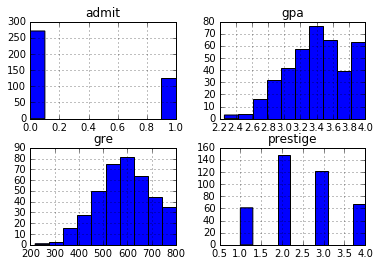

In [45]:
print df_raw.std()

print pd.crosstab(df_raw['admit'], df_raw['prestige'], rownames=['admit'])

# plot all of the columns
df_raw.hist()

Mean (STD) or counts by admission status for each variable

| Not Admitted | Admitted
---| ---|---
GPA | (mean/std) 3.35/0.38 | (mean/std) 3.49/0.37
GRE | (mean/std) 573.58/116.06 | (mean/std) 618.57/109.25
Prestige 1 | frequency (%) 10.33% | frequency (%) 26.20%
Prestige 2 | frequency (%) 35.05% | frequency (%) 42.06%
Prestige 3 |frequency (%)  34.31% | frequency (%) 22.23%
Prestige 4 |frequency (%)  20.30% | frequency (%) 9.53%

### Question 4. Methods: Write up the methods used in your analysis.

Answer: 

1) Exploratory Analysis

    1) Summary table
    
    2) Remove missing data points 
        
    3) Correlation

3) Frequency tables 

4) Dummy variables

5) Logistic regression

6) Odds ratio of coefficients and 95% confidence intervals

In [46]:
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data['intercept'] = 1.0

In [47]:
trainCols = data[ ['gre', 'gpa', 'prestige_2.0','prestige_3.0','prestige_4.0','intercept'] ]
logitMod = sm.Logit(data.admit, trainCols)
logitRes = logitMod.fit()
print logitRes.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Apr 2016   Pseudo R-squ.:                 0.08166
Time:                        18:12:11   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793

In [48]:
coeffs = logitRes.params
CI = logitRes.conf_int()
CI['OR'] = coeffs
CI.columns = ['2.5%', '97.5%', 'OR']
print np.exp(CI)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


### Question 5. Results: Write up your results.

Answer: GRE, GPA, and prestige all affect admissions. As GRE and GPA increase the probabilitiy of admission increases. Varying prestige levels significantly alter chances of admission. 

In [49]:
np.exp(logitRes.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64

### Question 6. Visuals: Provide a table or visualization of these results.

In [ ]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
        # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')

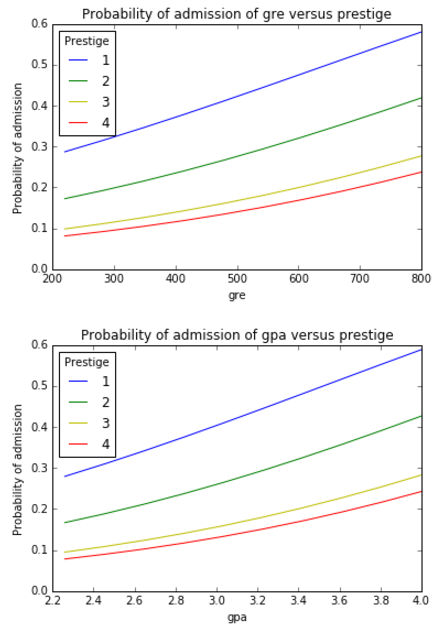

In [54]:
from IPython.display import Image
Image("graphs.png")


### question 7. Discussion: Write up your discussion and future steps.

Answer: 
From the graphs above one can deduce that higher GPA and GRE levels result in higher likelihood of admission, but prestige clearly plays a substantial role, as well. 